<a href="https://colab.research.google.com/github/prasetyomaulana/streamlit-example/blob/master/Churn_Prediction_Data_Science_Project_Prasetyo_Maulana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library yang Diperlukan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
import plotly.express as px
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# **Menampilkan Dataset**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Dataset = pd.read_csv('/content/Dataset1_Customer_Churn.csv')

In [4]:
# Dataset = pd.read_csv("/content/drive/MyDrive/Bootcamp Data Science/Colab Notebooks/Final Project/Dataset1_Customer_Churn.csv")
# Dataset

In [5]:
Dataset = pd.read_csv("/content/drive/MyDrive/Classroom/Dataset1_Customer_Churn (1).csv")
Dataset

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,15634602,Female,42,619,101348.88,1,1
1,15647311,Female,41,608,112542.58,0,0
2,15619304,Female,42,502,113931.57,1,1
3,15701354,Female,39,699,93826.63,0,0
4,15737888,Female,43,850,79084.10,1,0
...,...,...,...,...,...,...,...
9995,15606229,Male,39,771,96270.64,1,0
9996,15569892,Male,35,516,101699.77,1,0
9997,15584532,Female,36,709,42085.58,0,1
9998,15682355,Male,42,772,92888.52,1,1


# **Exploratory Data Analysis**

In [6]:
def dataoveriew(Dataset, message):
    print(f'{message}:\n')
    print('Number of rows: ', Dataset.shape[0])
    print("\nNumber of features:", Dataset.shape[1])
    print("\nData Features:")
    print(Dataset.columns.tolist())
    print("\nMissing values:", Dataset.isnull().sum().values.sum())
    print("\nUnique values:")
    print(Dataset.nunique())
    
dataoveriew(Dataset, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  10000

Number of features: 7

Data Features:
['CustomerId', 'Gender', 'Age', 'CreditScore', 'EstimatedSalary', 'HasCrCard', 'Exited']

Missing values: 0

Unique values:
CustomerId         10000
Gender                 2
Age                   70
CreditScore          460
EstimatedSalary     9999
HasCrCard              2
Exited                 2
dtype: int64


Dataset memiliki 10000 Baris dan 7 Kolom. 

Ada 1 kolom(fitur) kategorikal :

* **Gender**: Apakah pelanggan merupakan Laki-Laki atau Perempuan

Ada 5 kolom(fitur) numerikal :

* **CustomerID** : Identitas unik setiap pelanggan
* **Age** : Usia Pelanggan
* **CreditScore** : Skor Kredit Pelanggan
* **EstimatedSalary** : Estimasi Pendapatan Pelanggan
* **HasCrCard** : Apakah mpelanggan memiliki kartu kredit atau tidak, 1 = memiliki, 0 = tidak memiliki (Binary, Ya atau Tidak)

Kolom(Fitur) Prediksi :
* **Exited** : Apakah pelanggan akan meninggalkan layanan atau tidak (Binary, Ya atau Tidak)




In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   EstimatedSalary  10000 non-null  float64
 5   HasCrCard        10000 non-null  int64  
 6   Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 547.0+ KB


In [8]:
Dataset.describe()

,CustomerId,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.569094e+07,38.921800,650.528800,100090.239881,0.70550,0.203700
std,7.193619e+04,10.487806,96.653299,57510.492818,0.45584,0.402769
min,1.556570e+07,18.000000,350.000000,11.580000,0.00000,0.000000
25%,1.562853e+07,32.000000,584.000000,51002.110000,0.00000,0.000000
50%,1.569074e+07,37.000000,652.000000,100193.915000,1.00000,0.000000
75%,1.575323e+07,44.000000,718.000000,149388.247500,1.00000,0.000000
max,1.581569e+07,92.000000,850.000000,199992.480000,1.00000,1.000000


In [9]:
Dataset.dtypes

CustomerId           int64
Gender              object
Age                  int64
CreditScore          int64
EstimatedSalary    float64
HasCrCard            int64
Exited               int64
dtype: object

* Dari pengecekan tipe data diatas menggunakan dtypes, diketahui bahwa terdapat kolom dengan tipe data object, tipe data object tersebut harus diubah terlebih dahulu menjadi categorical data supaya pada saat di label encoder tidak ada masalah

In [10]:
# Cek Data Duplikat
Dataset[Dataset.duplicated(keep=False)]

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited


In [11]:
#Statistika Deskriptif Data Kategorial
Dataset.describe(include=["object"])

,Gender
count,10000
unique,2
top,Male
freq,5457


In [12]:
# Untuk mengecek apakah data balance atau tidak
Counter(Dataset["Exited"])

Counter({1: 2037, 0: 7963})

Dari grafik dan keterangan diatas, dapat dilihat bahwa fitur target memiliki jumlah yang tidak seimbang, dalam hal ini disebut "Imbalance Data". Sehingga nantinya, saat di tahap pre-processing data, data target perlu di handling dengan Random Over Sampling

## Visualisasi Section

In [13]:
# # ax = sns.lmplot(x ='Gender', data=Dataset, hue='HasCrCard', palette='pink')
# ax = sns.lmplot(x = 'Gender', y = 'Exited', data=Dataset, hue='HasCrCard', palette='Set1')

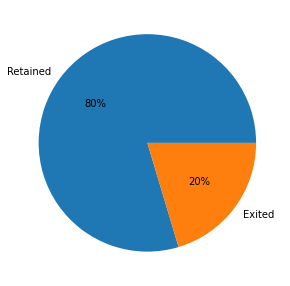

In [14]:
#memvisualisasi persentase Churn pada dataset 
f, ax = plt.subplots(figsize=(5,5)) 
labels = ['Retained','Exited'] 
churn = Dataset.Exited.value_counts() 
ax.pie(churn, labels=labels, autopct='%.0f%%') 
plt.show()

Memvisualisasikan prediksi pelanggan yang meninggalkan produk layanan berlangganan dari sebuah perusahaan. Dari grafik pie diatas, dapat disimpulkan bahwa terdapat masalah data yang tidak seimbang. 
* Churn: No – 80%
* Churn: Yes – 20%

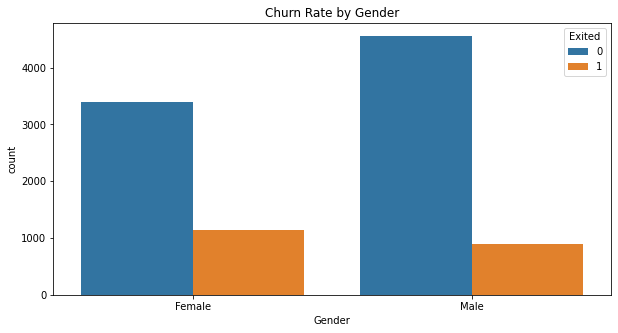

In [15]:
f, ax = plt.subplots(1, figsize=(10,5))
sns.countplot(x='Gender', hue='Exited', data=Dataset)
plt.title('Churn Rate by Gender')
plt.show()

Dari grafik diatas dapat dilihat bahwa fitur 'Gender' memiliki distribusi churn yang tidak seimbang, dimana terdapat perbedaan churn 'No' yang lebih tinggi pada Pria dan churn 'Yes' pada Wanita. Selain itu, dapat disimpulkan juga bahwa tingkat churn 'Yes' pada wanita lebih tinggi dibandingkan tingkat churn 'Yes' pada Pria, artinya kelompok pelanggan wanita memiliki kecenderungan untuk meninggalkan layanan berlangganan produk perusahaan

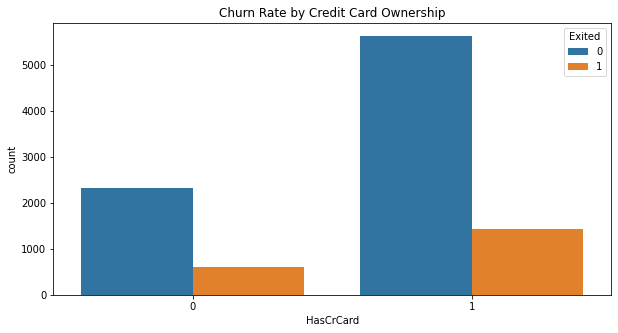

In [16]:
f, ax = plt.subplots(1, figsize=(10,5))
sns.countplot(x='HasCrCard', hue='Exited', data=Dataset)
plt.title('Churn Rate by Credit Card Ownership')
plt.show()

Dari Grafik diatas dapat disimpulkan bahwa fitur 'HasCrCard' memiliki distribusi churn yang tidak seimbang, dimana terdapat perbedaan churn 'No' dan 'Yes'yang lebih tinggi pada kelompok yang memiliki Kartu Kredit. Dapat disimpulkan juga bahwa kelompok pelanggan yang memiliki kartu kredit memiliki tingkat Churn 'Yes' yang lebih tinggi dibandingkan kelompok pelanggan yang tidak memiliki kartu kredit

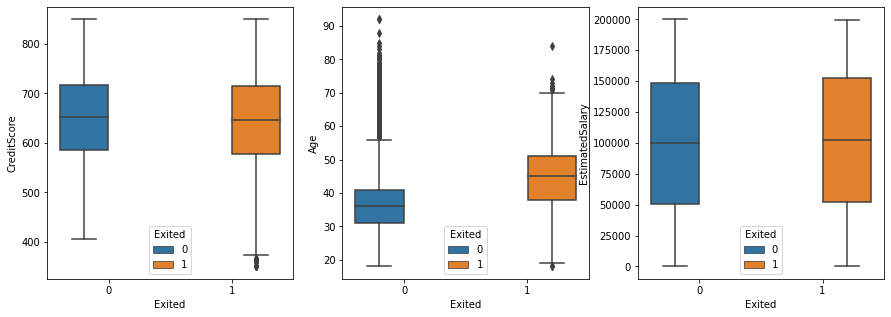

In [67]:
f, ax = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x='Exited', y='CreditScore', hue='Exited', data=Dataset, ax=ax[0])
sns.boxplot(x='Exited', y='Age', hue='Exited', data=Dataset, ax=ax[1])
sns.boxplot(x='Exited', y='EstimatedSalary', hue='Exited', data=Dataset, ax=ax[2])
plt.show()

Fitur Numerikal dicoba untuk dibuat data kategorikal

Interpretasi diagram diatas (Alivia)

In [18]:
PetaKorelasi = Dataset.corr()
PetaKorelasi

,CustomerId,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
CustomerId,1.000000,0.009497,0.005308,0.015271,-0.014025,-0.006248
Age,0.009497,1.000000,-0.003965,-0.007201,-0.011721,0.285323
CreditScore,0.005308,-0.003965,1.000000,-0.001384,-0.005458,-0.027094
EstimatedSalary,0.015271,-0.007201,-0.001384,1.000000,-0.009933,0.012097
HasCrCard,-0.014025,-0.011721,-0.005458,-0.009933,1.000000,-0.007138
Exited,-0.006248,0.285323,-0.027094,0.012097,-0.007138,1.000000


**Note: Korelasi >=0.5 baik + atau minus, ada hubungan erat antara variabel**
**Korelasi <0.5 baik + atau minus, tidak ada hubungan erat antar variabel**

Dari analisis korelasi dapat diketahui bahwa ..... mempengaruhi Variabel Exited.

Heatmap = Pearseon, cocok untuk kasus regresi

Kasus Klasifikasi menggunakan tes korelasi Chi-Square, untuk kasus ini coba pake chi square

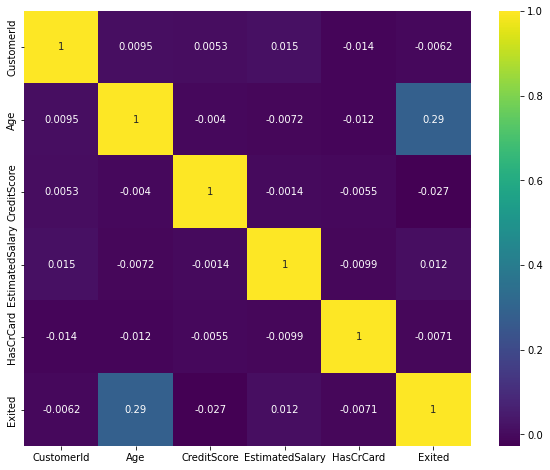

In [19]:

plt.figure(figsize=(10,8))
sns.heatmap(PetaKorelasi, annot=True, cmap= 'viridis')
plt.show()

# **Feature Engineering**

In [20]:
Dataset.head()

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,15634602,Female,42,619,101348.88,1,1
1,15647311,Female,41,608,112542.58,0,0
2,15619304,Female,42,502,113931.57,1,1
3,15701354,Female,39,699,93826.63,0,0
4,15737888,Female,43,850,79084.10,1,0


In [21]:
Dataset['CreditScoreGivenAge'] = Dataset['CreditScore'] / Dataset['Age']
Dataset.head()

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited,CreditScoreGivenAge
0,15634602,Female,42,619,101348.88,1,1,14.738095
1,15647311,Female,41,608,112542.58,0,0,14.829268
2,15619304,Female,42,502,113931.57,1,1,11.952381
3,15701354,Female,39,699,93826.63,0,0,17.923077
4,15737888,Female,43,850,79084.10,1,0,19.767442


In [22]:
#Mengubah Urutan Kolom CreditScoreGivenAge yang awalnya berada di urutan terakhir dari dataframe, menjadi di urutan sebelum Exited
Dataset1 = ['CustomerId', 'Gender', 'Age', 'CreditScore', 'CreditScoreGivenAge', 'EstimatedSalary',
       'HasCrCard', 'Exited']
Dataset = Dataset[Dataset1]

In [23]:
Dataset.head()

,CustomerId,Gender,Age,CreditScore,CreditScoreGivenAge,EstimatedSalary,HasCrCard,Exited
0,15634602,Female,42,619,14.738095,101348.88,1,1
1,15647311,Female,41,608,14.829268,112542.58,0,0
2,15619304,Female,42,502,11.952381,113931.57,1,1
3,15701354,Female,39,699,17.923077,93826.63,0,0
4,15737888,Female,43,850,19.767442,79084.10,1,0


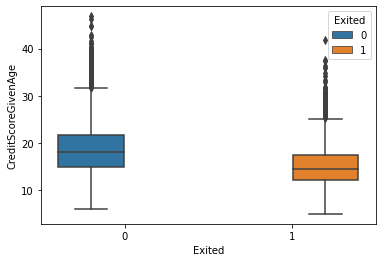

In [24]:
sns.boxplot(y = "CreditScoreGivenAge", x= "Exited", hue="Exited", data=Dataset)
plt.show()

# **Data Preparation**

In [25]:
#Converting objects labels into categorical
Dataset[['Gender']] = Dataset[['Gender']].astype('category')
Dataset.dtypes

CustomerId                int64
Gender                 category
Age                       int64
CreditScore               int64
CreditScoreGivenAge     float64
EstimatedSalary         float64
HasCrCard                 int64
Exited                    int64
dtype: object

In [26]:
#Converting category labels into numerical using LabelEncoder
label = LabelEncoder()
DatasetPrep = Dataset.copy()
DatasetPrep.Gender = label.fit_transform(DatasetPrep.Gender)
# Dataset.dtypes
DatasetPrep

,CustomerId,Gender,Age,CreditScore,CreditScoreGivenAge,EstimatedSalary,HasCrCard,Exited
0,15634602,0,42,619,14.738095,101348.88,1,1
1,15647311,0,41,608,14.829268,112542.58,0,0
2,15619304,0,42,502,11.952381,113931.57,1,1
3,15701354,0,39,699,17.923077,93826.63,0,0
4,15737888,0,43,850,19.767442,79084.10,1,0
...,...,...,...,...,...,...,...,...
9995,15606229,1,39,771,19.769231,96270.64,1,0
9996,15569892,1,35,516,14.742857,101699.77,1,0
9997,15584532,0,36,709,19.694444,42085.58,0,1
9998,15682355,1,42,772,18.380952,92888.52,1,1


coba pakai one hot aencoder untuk menguji benar atau tidak akurasi nya nambah

Female = 0, Male = 1

In [27]:
#Menghapus Variabel Customer Id, karena bukan hal yang memiliki pengaruh terhadap variabel target
DatasetPrep = DatasetPrep.drop(columns=['CustomerId'])
DatasetPrep.head()

,Gender,Age,CreditScore,CreditScoreGivenAge,EstimatedSalary,HasCrCard,Exited
0,0,42,619,14.738095,101348.88,1,1
1,0,41,608,14.829268,112542.58,0,0
2,0,42,502,11.952381,113931.57,1,1
3,0,39,699,17.923077,93826.63,0,0
4,0,43,850,19.767442,79084.10,1,0


In [28]:
# Simplify Column Name
DatasetPrep.rename(columns={'Gender':'X1', 'Age':'X2',
                   'CreditScore':'X3','EstimatedSalary':'X5','HasCrCard':'X6', 'CreditScoreGivenAge':'X4',
                   'Exited':'Y'}, inplace=True)
DatasetPrep

,X1,X2,X3,X4,X5,X6,Y
0,0,42,619,14.738095,101348.88,1,1
1,0,41,608,14.829268,112542.58,0,0
2,0,42,502,11.952381,113931.57,1,1
3,0,39,699,17.923077,93826.63,0,0
4,0,43,850,19.767442,79084.10,1,0
...,...,...,...,...,...,...,...
9995,1,39,771,19.769231,96270.64,1,0
9996,1,35,516,14.742857,101699.77,1,0
9997,0,36,709,19.694444,42085.58,0,1
9998,1,42,772,18.380952,92888.52,1,1


In [29]:
X = DatasetPrep.drop('Y', axis=1)
y = DatasetPrep['Y']

## Tanpa SMOTE

In [30]:
X_TanpaSMOTE = X.copy()
y_TanpaSMOTE = y.copy()

## Setelah SMOTE

In [31]:
X_SMOTE = X.copy()
y_SMOTE = y.copy()

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_SMOTE, y_SMOTE = smote.fit_resample(X_SMOTE,y_SMOTE)

### Train Test Split Data Tanpa SMOTE

Dikarenakan data target imbalanced(bisa dilihat di visualisasi data exited pada diagram lingkaran), maka kita akan menggunakan stratified random sampling, karena nanti untuk train nanti Y nya rasionya akan disetarakan

In [33]:
# #  Train-Tes Split Data
# from sklearn.model_selection import train_test_split

# X = DatasetPrep.drop(columns=['Y']).copy()
# y = DatasetPrep['Y'].copy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.model_selection import train_test_split

X_trainTanpaSMOTE,X_testTanpaSMOTE,y_trainTanpaSMOTE,y_testTanpaSMOTE = train_test_split(X_TanpaSMOTE,y_TanpaSMOTE,test_size = 0.35,
                                                 stratify=y_TanpaSMOTE,random_state = 123)

In [35]:
# Normalisasi Data = fungsinya agar range antar fitur sama
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

X_trainTanpaSMOTE = pd.DataFrame(mm.fit_transform(X_trainTanpaSMOTE),
                                 columns=X_trainTanpaSMOTE.columns)
X_testTanpaSMOTE = pd.DataFrame(mm.fit_transform(X_testTanpaSMOTE),
                                 columns=X_testTanpaSMOTE.columns)

### Train Test Split Data SMOTE

In [36]:
from sklearn.model_selection import train_test_split

X_trainSMOTE,X_testSMOTE,y_trainSMOTE,y_testSMOTE = train_test_split(X_SMOTE,y_SMOTE,test_size = 0.35,
                                                 stratify=y_SMOTE,random_state = 123)

In [37]:
# Normalisasi Data = fungsinya agar range antar fitur sama
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

X_trainSMOTE = pd.DataFrame(mm.fit_transform(X_trainSMOTE),
                                 columns=X_trainSMOTE.columns)
X_testSMOTE = pd.DataFrame(mm.fit_transform(X_testSMOTE),
                                 columns=X_testSMOTE.columns)

### Modelling

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, auc

#### Logistic Regression Tanpa SMOTE

In [40]:
#FitModel LogisticRegression
logTanpaSMOTE = LogisticRegression()
logTanpaSMOTE.fit(X_trainTanpaSMOTE, y_trainTanpaSMOTE)

LogisticRegression()

In [41]:
print("Logistic Regression")
y_predLRTanpaSMOTE = logTanpaSMOTE.predict(X_testTanpaSMOTE)

print("Accuracy: ", accuracy_score(y_testTanpaSMOTE, y_predLRTanpaSMOTE).round(2))
print("Precission: ", precision_score(y_testTanpaSMOTE, y_predLRTanpaSMOTE).round(2))
print("Recall: ", recall_score(y_testTanpaSMOTE, y_predLRTanpaSMOTE).round(2))
print("F1-Score: ", f1_score(y_testTanpaSMOTE, y_predLRTanpaSMOTE).round(2))

y_pred_probaLRTanpaSMOTE = logTanpaSMOTE.predict_proba(X_testTanpaSMOTE)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_testTanpaSMOTE, y_pred_probaLRTanpaSMOTE).round(2))

Logistic Regression
Accuracy:  0.78
Precission:  0.24
Recall:  0.03
F1-Score:  0.05
ROC-AUC:  0.72


#### Logistic Regression SMOTE

In [42]:
#FitModel LogisticRegression
logSMOTE = LogisticRegression()
logSMOTE.fit(X_trainSMOTE, y_trainSMOTE)

LogisticRegression()

In [43]:
print("Logistic Regression")
y_predLRSMOTE = logSMOTE.predict(X_testSMOTE)

print("Accuracy: ", accuracy_score(y_testSMOTE, y_predLRSMOTE).round(2))
print("Precission: ", precision_score(y_testSMOTE, y_predLRSMOTE).round(2))
print("Recall: ", recall_score(y_testSMOTE, y_predLRSMOTE).round(2))
print("F1-Score: ", f1_score(y_testSMOTE, y_predLRSMOTE).round(2))

y_pred_probaLRSMOTE = logSMOTE.predict_proba(X_testSMOTE)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_testSMOTE, y_pred_probaLRSMOTE).round(2))

Logistic Regression
Accuracy:  0.72
Precission:  0.7
Recall:  0.75
F1-Score:  0.73
ROC-AUC:  0.78


NILAI AKURASI TIDAK TERLALU DILIHAT, seperti penilaian awal saja, depend on case
Precisi, Recall, ROC-AUC lebih digunakan. fungsi recall

## Random Forest Tanpa SMOTE

In [44]:
#FitModel RandomForest
rfTanpaSMOTE = RandomForestClassifier()
rfTanpaSMOTE.fit(X_trainTanpaSMOTE, y_trainTanpaSMOTE)

RandomForestClassifier()

In [45]:
print("RandomForest")
y_predRFTanpaSMOTE = rfTanpaSMOTE.predict(X_testTanpaSMOTE)

print("Accuracy: ", accuracy_score(y_testTanpaSMOTE, y_predRFTanpaSMOTE).round(2))
print("Precission: ", precision_score(y_testTanpaSMOTE, y_predRFTanpaSMOTE).round(2))
print("Recall: ", recall_score(y_testTanpaSMOTE, y_predRFTanpaSMOTE).round(2))
print("F1-Score: ", f1_score(y_testTanpaSMOTE, y_predRFTanpaSMOTE).round(2))

y_pred_probaRFTanpaSMOTE = rfTanpaSMOTE.predict_proba(X_testTanpaSMOTE)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_testTanpaSMOTE, y_pred_probaRFTanpaSMOTE).round(2))

RandomForest
Accuracy:  0.8
Precission:  0.51
Recall:  0.22
F1-Score:  0.31
ROC-AUC:  0.71


## Random Forest SMOTE

In [46]:
#FitModel RandomForest
rfSMOTE = RandomForestClassifier()
rfSMOTE.fit(X_trainSMOTE, y_trainSMOTE)

RandomForestClassifier()

In [47]:
print("RandomForest")
y_predRFSMOTE = rfSMOTE.predict(X_testSMOTE)

print("Accuracy: ", accuracy_score(y_testSMOTE, y_predRFSMOTE).round(2))
print("Precission: ", precision_score(y_testSMOTE, y_predRFSMOTE).round(2))
print("Recall: ", recall_score(y_testSMOTE, y_predRFSMOTE).round(2))
print("F1-Score: ", f1_score(y_testSMOTE, y_predRFSMOTE).round(2))

y_pred_probaRFSMOTE = rfSMOTE.predict_proba(X_testSMOTE)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_testSMOTE, y_pred_probaRFSMOTE).round(2))

RandomForest
Accuracy:  0.76
Precission:  0.76
Recall:  0.75
F1-Score:  0.75
ROC-AUC:  0.83


## Decision Tree Tanpa SMOTE

In [48]:
#FitModel D3C
dtcTanpaSMOTE = DecisionTreeClassifier()
dtcTanpaSMOTE.fit(X_trainTanpaSMOTE, y_trainTanpaSMOTE)

DecisionTreeClassifier()

In [49]:
print("Decission Tree")
y_predDTTanpaSMOTE = dtcTanpaSMOTE.predict(X_testTanpaSMOTE)

print("Accuracy: ", accuracy_score(y_testTanpaSMOTE, y_predDTTanpaSMOTE).round(2))
print("Precission: ", precision_score(y_testTanpaSMOTE, y_predDTTanpaSMOTE).round(2))
print("Recall: ", recall_score(y_testTanpaSMOTE, y_predDTTanpaSMOTE).round(2))
print("F1-Score: ", f1_score(y_testTanpaSMOTE, y_predDTTanpaSMOTE).round(2))

y_pred_probaDTTanpaSMOTE = dtcTanpaSMOTE.predict_proba(X_testTanpaSMOTE)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_testTanpaSMOTE, y_pred_probaDTTanpaSMOTE).round(2))

Decission Tree
Accuracy:  0.73
Precission:  0.32
Recall:  0.32
F1-Score:  0.32
ROC-AUC:  0.58


## Decision Tree SMOTE

In [50]:
#FitModel D3C
dtcSMOTE = DecisionTreeClassifier()
dtcSMOTE.fit(X_trainSMOTE, y_trainSMOTE)

DecisionTreeClassifier()

In [51]:
print("Decission Tree")
y_predDTSMOTE = dtcTanpaSMOTE.predict(X_testSMOTE)

print("Accuracy: ", accuracy_score(y_testSMOTE, y_predDTSMOTE).round(2))
print("Precission: ", precision_score(y_testSMOTE, y_predDTSMOTE).round(2))
print("Recall: ", recall_score(y_testSMOTE, y_predDTSMOTE).round(2))
print("F1-Score: ", f1_score(y_testSMOTE, y_predDTSMOTE).round(2))

y_pred_probaDTSMOTE = dtcSMOTE.predict_proba(X_testSMOTE)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_testSMOTE, y_pred_probaDTSMOTE).round(2))

Decission Tree
Accuracy:  0.66
Precission:  0.75
Recall:  0.46
F1-Score:  0.57
ROC-AUC:  0.69


## KNN Tanpa SMOTE

In [52]:
#FitModel KNN
knnTanpaSMOTE = KNeighborsClassifier(n_neighbors = 2) #2 karena binary class
knnTanpaSMOTE.fit(X_trainTanpaSMOTE, y_trainTanpaSMOTE)

KNeighborsClassifier(n_neighbors=2)

In [53]:
print("K-Nearest Neighbour")
y_predKNNTanpaSMOTE = knnTanpaSMOTE.predict(X_testTanpaSMOTE)

print("Accuracy: ", accuracy_score(y_testTanpaSMOTE, y_predKNNTanpaSMOTE).round(2))
print("Precission: ", precision_score(y_testTanpaSMOTE, y_predKNNTanpaSMOTE).round(2))
print("Recall: ", recall_score(y_testTanpaSMOTE, y_predKNNTanpaSMOTE).round(2))
print("F1-Score: ", f1_score(y_testTanpaSMOTE, y_predKNNTanpaSMOTE).round(2))

y_pred_probaKNNTanpaSMOTE = knnTanpaSMOTE.predict_proba(X_testTanpaSMOTE)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_testTanpaSMOTE, y_pred_probaKNNTanpaSMOTE).round(2))

K-Nearest Neighbour
Accuracy:  0.79
Precission:  0.47
Recall:  0.13
F1-Score:  0.2
ROC-AUC:  0.61


## KNN SMOTE

In [54]:
#FitModel KNN
knnSMOTE = KNeighborsClassifier(n_neighbors = 2) #2 karena binary class
knnSMOTE.fit(X_trainSMOTE, y_trainSMOTE)

KNeighborsClassifier(n_neighbors=2)

In [55]:
print("K-Nearest Neighbour")
y_predKNNSMOTE = knnSMOTE.predict(X_testSMOTE)

print("Accuracy: ", accuracy_score(y_testSMOTE, y_predKNNSMOTE).round(2))
print("Precission: ", precision_score(y_testSMOTE, y_predKNNSMOTE).round(2))
print("Recall: ", recall_score(y_testSMOTE, y_predKNNSMOTE).round(2))
print("F1-Score: ", f1_score(y_testSMOTE, y_predKNNSMOTE).round(2))

y_pred_probaKNNSMOTE = knnSMOTE.predict_proba(X_testSMOTE)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_testSMOTE, y_pred_probaKNNSMOTE).round(2))

K-Nearest Neighbour
Accuracy:  0.7
Precission:  0.78
Recall:  0.55
F1-Score:  0.64
ROC-AUC:  0.76


## SVC Tanpa SMOTE

In [56]:
from sklearn.svm import SVC

svcTanpaSMOTE = SVC(probability=True)
svcTanpaSMOTE.fit(X_trainTanpaSMOTE, y_trainTanpaSMOTE)

SVC(probability=True)

In [57]:
print("SVC")
y_predSVCTanpaSMOTE = svcTanpaSMOTE.predict(X_testTanpaSMOTE)

print("Accuracy: ", accuracy_score(y_testTanpaSMOTE, y_predSVCTanpaSMOTE).round(2))
print("Precission: ", precision_score(y_testTanpaSMOTE, y_predSVCTanpaSMOTE).round(2))
print("Recall: ", recall_score(y_testTanpaSMOTE, y_predSVCTanpaSMOTE).round(2))
print("F1-Score: ", f1_score(y_testTanpaSMOTE, y_predSVCTanpaSMOTE).round(2))

y_pred_probaSVCTanpaSMOTE = svcTanpaSMOTE.predict_proba(X_testTanpaSMOTE)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_testTanpaSMOTE, y_pred_probaSVCTanpaSMOTE).round(2))

SVC
Accuracy:  0.8
Precission:  0.0
Recall:  0.0
F1-Score:  0.0
ROC-AUC:  0.69


## SVC SMOTE

In [58]:
from sklearn.svm import SVC

svcSMOTE = SVC(probability=True)
svcSMOTE.fit(X_trainSMOTE, y_trainSMOTE)

SVC(probability=True)

In [59]:
print("SVC")
y_predSVCSMOTE = svcSMOTE.predict(X_testSMOTE)

print("Accuracy: ", accuracy_score(y_testSMOTE, y_predSVCSMOTE).round(2))
print("Precission: ", precision_score(y_testSMOTE, y_predSVCSMOTE).round(2))
print("Recall: ", recall_score(y_testSMOTE, y_predSVCSMOTE).round(2))
print("F1-Score: ", f1_score(y_testSMOTE, y_predSVCSMOTE).round(2))

y_pred_probaSVCSMOTE = svcSMOTE.predict_proba(X_testSMOTE)[::, -1]
print("ROC-AUC: ", roc_auc_score(y_testSMOTE, y_pred_probaSVCSMOTE).round(2))

SVC
Accuracy:  0.73
Precission:  0.73
Recall:  0.73
F1-Score:  0.73
ROC-AUC:  0.8


# Saving Model

### Simulasi Prediksi

In [60]:
X_SavingModel = X_SMOTE.copy()
y_SavingModel = y_SMOTE.copy()

In [61]:
# Test Split
X_trainSM,X_testSM,y_trainSM,y_testSM = train_test_split(X_SavingModel,y_SavingModel,test_size = 0.35, random_state = 123)

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
pipe = Pipeline([('Scalling', MinMaxScaler()), ('AlgoritmayangDipilih', RandomForestClassifier())])
pipe.fit(X_trainSM, y_trainSM)

Pipeline(steps=[('Scalling', MinMaxScaler()),
                ('AlgoritmayangDipilih', RandomForestClassifier())])

In [64]:
pipe.predict([[0,	42,	619,	14.738095,	101348.88,	1]])

array([1])

### Saving Model

In [65]:
# saving the model 
import pickle 
PrediksiChurnITMEANS = 'PrediksiModel.pkl'
pickle.dump(pipe, open(PrediksiChurnITMEANS, 'wb'))
LoadModel = pickle.load(open('PrediksiModel.pkl', 'rb'))

In [66]:
LoadModel.predict([[0,	42,	619,	14.738095,	101348.88,	1]])

array([1])